https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data


In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download thedevastator/unlock-profits-with-e-commerce-sales-data

  0% 0.00/6.33M [00:00<?, ?B/s]
100% 6.33M/6.33M [00:00<00:00, 110MB/s]


In [ ]:
! unzip /content/unlock-profits-with-e-commerce-sales-data.zip

Archive:  /content/unlock-profits-with-e-commerce-sales-data.zip
  inflating: Amazon Sale Report.csv  
  inflating: Cloud Warehouse Compersion Chart.csv  
  inflating: Expense IIGF.csv        
  inflating: International sale Report.csv  
  inflating: May-2022.csv            
  inflating: P  L March 2021.csv     
  inflating: Sale Report.csv         


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df_amazon = pd.read_csv('/content/Amazon Sale Report.csv')
df_amazon.head(3)

<ipython-input-5-eacb389410ac>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_amazon = pd.read_csv('/content/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [ ]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [ ]:
df_amazon.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [ ]:
df_amazon.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [ ]:
df_amazon.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


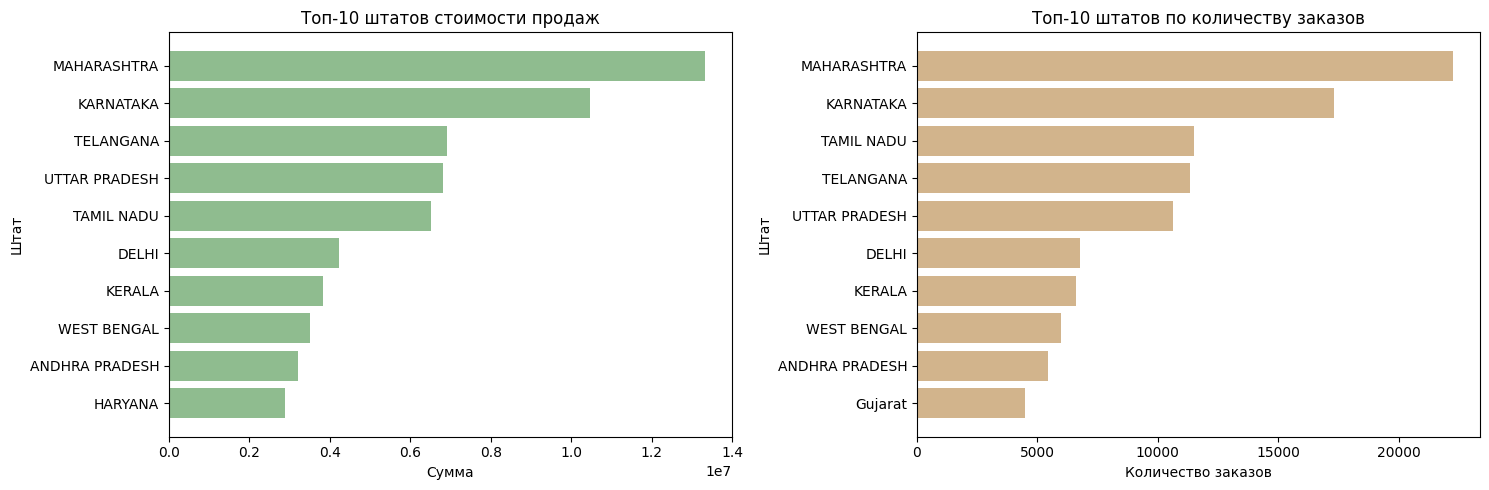

In [ ]:
# Данные для наиболее прибыльных штатов
top_10_state_amount = df_amazon.groupby('ship-state')
top_10_state_amount = top_10_state_amount['Amount'].sum().sort_values(ascending=False).head(10)
top_10_state_amount = top_10_state_amount.sort_values(ascending=True)  # Сортируем по убыванию
states_amount = top_10_state_amount.index
amounts = top_10_state_amount.values

# Данные для штатов с наибольшим количеством заказов
top_10_state_order = df_amazon.groupby('ship-state')
top_10_state_order = top_10_state_order['Order ID'].count().sort_values(ascending=False).head(10)
top_10_state_order = top_10_state_order.sort_values(ascending=True)  # Сортируем по убыванию
states_order = top_10_state_order.index
order_counts = top_10_state_order.values

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Построbv горизонтальную столбчатую диаграмму для наиболее прибыльных штатов
axs[0].barh(states_amount, amounts, color = 'darkseagreen')
axs[0].set_xlabel('Сумма')
axs[0].set_ylabel('Штат')
axs[0].set_title('Топ-10 штатов стоимости продаж')

# Построbv горизонтальную столбчатую диаграмму для штатов с наибольшим количеством заказов
axs[1].barh(states_order, order_counts, color = 'tan')
axs[1].set_xlabel('Количество заказов')
axs[1].set_ylabel('Штат')
axs[1].set_title('Топ-10 штатов по количеству заказов')

plt.tight_layout()

plt.show()

In [ ]:
df_amazon.Status.unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [ ]:
#Сгруппируем статусы заказов в укрупненные группы
sales  = ['Shipped - Delivered to Buyer', 'Shipped', 'Shipped - Out for Delivery', 'Pending', 'Pending - Waiting for Pick Up', 'Shipping', 'Shipped - Picked Up']
refusals = ['Cancelled', 'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Returning to Seller']
direct_losses = ['Shipped - Lost in Transit', 'Shipped - Damaged']


In [ ]:
# Функция для определения группы по статусу
def categorize_status(status):
    if status in sales:
        return 'Sales'
    elif status in refusals:
        return 'Refusals'
    elif status in direct_losses:
        return 'Direct Losses'
    else:
        return 'Other'

# Добавим новый столбец 'status-group'
df_amazon['status-group'] = df_amazon['Status'].apply(categorize_status)

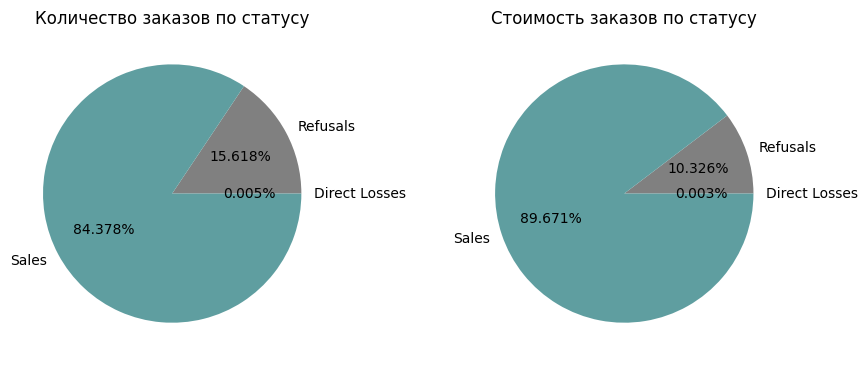

In [ ]:
list_of_states_top_10 = top_10_state_amount.index.tolist()
list_of_states_top_10

df_amazon_top_10_state = df_amazon[df_amazon['ship-state'].isin(list_of_states_top_10)]

# Группируем данные по столбцу 'status-group' и находим их количество и общую стоимость заказов
status_group_count = df_amazon_top_10_state.groupby('status-group')['Order ID'].count()
status_group_amount = df_amazon_top_10_state.groupby('status-group')['Amount'].sum()

# Строим круговую диаграмму.
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
colors = ['lightcoral', 'grey', 'cadetblue']

axs[0].pie(status_group_count, labels=status_group_count.index, colors = colors, autopct='%1.3f%%')
axs[0].set_title('Количество заказов по статусу', fontsize = 12)

axs[1].pie(status_group_amount, labels=status_group_amount.index, colors = colors, autopct='%1.3f%%')
axs[1].set_title('Стоимость заказов по статусу', fontsize = 12)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [ ]:
group_state_status = df_amazon_top_10_state.groupby(['ship-state', 'status-group'])['Amount'].sum().sort_values(ascending=False)
group_state_status = group_state_status.reset_index()

# Группируем данные по 'ship-state' и 'status-group' и суммируем 'Amount'
grouped_data = group_state_status.groupby(['ship-state', 'status-group'])['Amount'].sum().unstack(fill_value=0)

# Вычислим процент Refusals в каждом 'ship-state'
grouped_data['Refusals_Percentage'] = (grouped_data['Refusals'] / grouped_data['Sales']) * 100
grouped_data

status-group,Direct Losses,Refusals,Sales,Refusals_Percentage
ship-state,,,,
ANDHRA PRADESH,0.0,395979.72,2823852.0,14.022680
DELHI,0.0,397660.97,3837555.0,10.362352
HARYANA,0.0,279157.99,2602935.0,10.724739
KARNATAKA,998.0,957303.37,9522813.0,10.052737
KERALA,0.0,502996.58,3327231.0,15.117573
MAHARASHTRA,0.0,1280597.14,12054937.0,10.623010
TAMIL NADU,1136.0,653868.11,5860646.0,11.156929
TELANGANA,0.0,732103.65,6184512.0,11.837695
UTTAR PRADESH,0.0,792999.08,6023643.0,13.164776


<ipython-input-15-5fc637efce60>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_amazon.loc[:, 'Date'] = pd.to_datetime(df_amazon['Date'], format='%m-%d-%y')


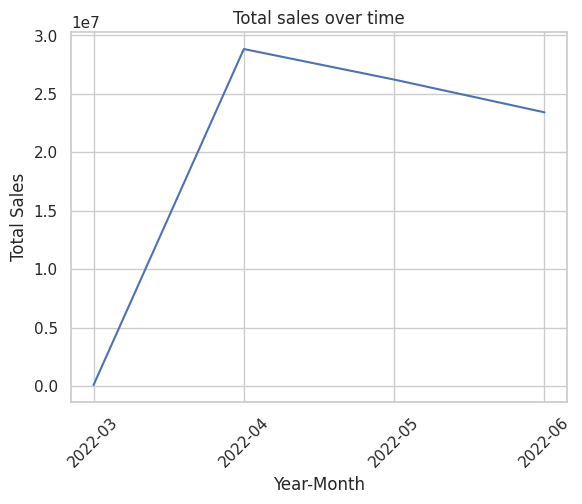

In [ ]:
# Какова общая тенденция общего объема продаж с течением времени?
df_amazon.loc[:, 'Date'] = pd.to_datetime(df_amazon['Date'], format='%m-%d-%y')

date_group = df_amazon.groupby(df_amazon['Date'].dt.to_period('M'))
sum_amount_by_date = date_group['Amount'].sum()
sum_amount_by_date.to_frame(name='TotalAmount')

sum_amount_by_date.index = sum_amount_by_date.index.strftime('%Y-%m')

# Построим график
sns.set(style="whitegrid")
sns.lineplot(x=sum_amount_by_date.index, y=sum_amount_by_date.values)
plt.title("Total sales over time")
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

ship-state
HARYANA           688.061063
UTTAR PRADESH     685.595607
DELHI             663.363008
TELANGANA         649.428961
KARNATAKA         640.576685
ANDHRA PRADESH    637.150722
MAHARASHTRA       634.436977
WEST BENGAL       631.347475
KERALA            624.949474
TAMIL NADU        603.009157
Name: Amount, dtype: float64


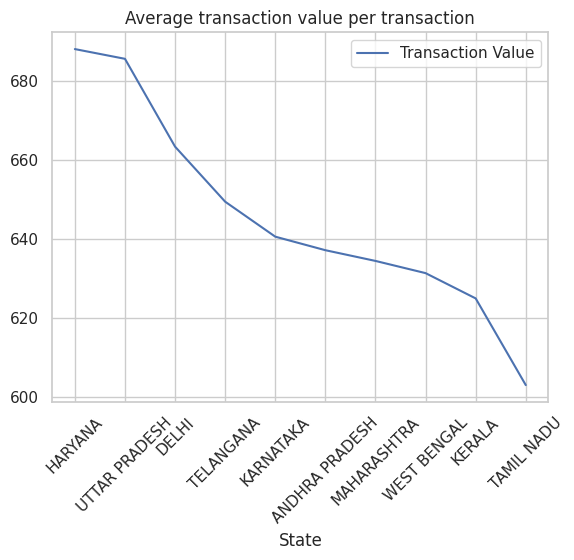

In [ ]:
# Какова средняя стоимость чека и как она различаются в зависимости от штата?

df_amazon_filtered_sales = df_amazon_top_10_state[df_amazon_top_10_state['status-group'] == 'Sales']
mean_price_by_state = df_amazon_filtered_sales.groupby('ship-state')['Amount'].mean().sort_values(ascending=False).head(10)
print(mean_price_by_state)

sns.lineplot(x=mean_price_by_state.index, y=mean_price_by_state.values, label='Transaction Value')
plt.title("Average transaction value per transaction")
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

                         index  Order ID  Date  Status  Fulfilment  \
Category ship-state                                                  
Blouse   ANDHRA PRADESH     32        32    32      32          32   
         DELHI              46        46    46      46          46   
         HARYANA            28        28    28      28          28   
         KARNATAKA         199       199   199     199         199   
         KERALA             25        25    25      25          25   
...                        ...       ...   ...     ...         ...   
kurta    MAHARASHTRA      8447      8447  8447    8447        8447   
         TAMIL NADU       5821      5821  5821    5821        5821   
         TELANGANA        4779      4779  4779    4779        4779   
         UTTAR PRADESH    3457      3457  3457    3457        3457   
         WEST BENGAL      2571      2571  2571    2571        2571   

                         Sales Channel   ship-service-level  Style   SKU  \
Category ship

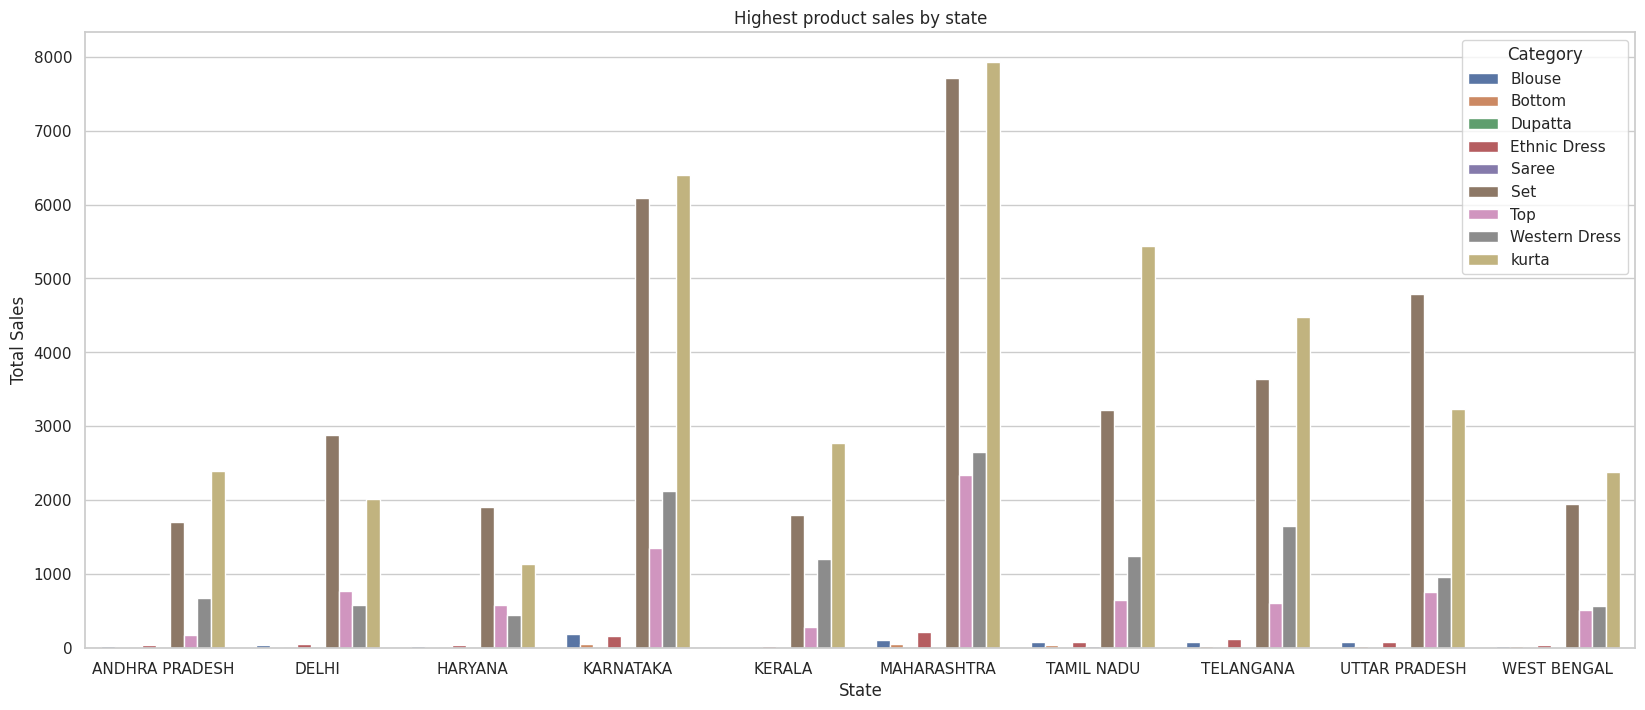

In [ ]:
# Какие продукты продаются больше всего и в каких штатах?

#Сгруппируем данные по продуктам и странам и просуммируем общий объем продаж по каждой группе.
product_top_10 = df_amazon_top_10_state.groupby(['Category', 'ship-state']).count()
print(product_top_10)

product_top_10 = product_top_10.reset_index()
plt.figure(figsize=(20, 8))
sns.barplot(x='ship-state', y='Amount', hue='Category', data=product_top_10)
plt.title("Highest product sales by state")
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

Категории с более высокой средней стоимостью:
                   Amount  Order ID
Category                           
Set            828.140078     38058
Saree          799.284560       134
Western Dress  764.261732     12798
Ethnic Dress   726.079956       959
Top            526.366059      8412
Blouse         521.841050       749
kurta          455.424513     40758
Bottom         345.914801       341
Dupatta        305.000000         3


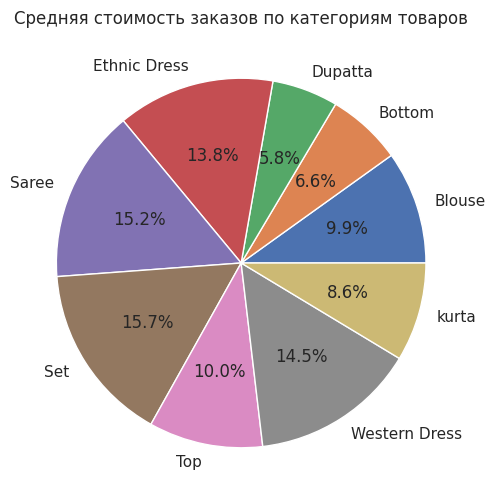


Категории с более высоким количеством транзакций:
                   Amount  Order ID
Category                           
kurta          455.424513     40758
Set            828.140078     38058
Western Dress  764.261732     12798
Top            526.366059      8412
Ethnic Dress   726.079956       959
Blouse         521.841050       749
Bottom         345.914801       341
Saree          799.284560       134
Dupatta        305.000000         3


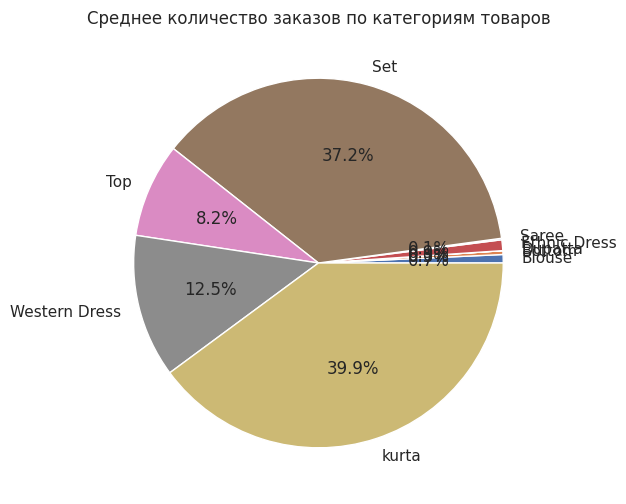

In [ ]:
# Какие категории продуктов имеют более высокую среднюю стоимость или количество транзакций, чем другие?

# Группируем данные по столбцу 'Category' и находим среднюю стоимость и количество транзакций.
category_stats = df_amazon_top_10_state.groupby('Category').agg({'Amount': 'mean', 'Order ID': 'count'})

# Сортируем результаты по средней стоимости или количеству транзакций в порядке убывания.
sorted_by_mean_amount = category_stats.sort_values(by='Amount', ascending=False)
sorted_by_transaction_count = category_stats.sort_values(by='Order ID', ascending=False)

print("Категории с более высокой средней стоимостью:")
print(sorted_by_mean_amount)

# Группируем данные по столбцу 'Category' и находим среднюю стоимость.
category_stats = df_amazon_top_10_state.groupby('Category')['Amount'].mean()

plt.figure(figsize=(10, 6))
plt.pie(category_stats, labels=category_stats.index, autopct='%1.1f%%')
plt.title('Средняя стоимость заказов по категориям товаров')
plt.show()

print("\nКатегории с более высоким количеством транзакций:")
print(sorted_by_transaction_count)

category_stats = df_amazon_top_10_state.groupby('Category')['Order ID'].count()

plt.figure(figsize=(10, 6))
plt.pie(category_stats, labels=category_stats.index, autopct='%1.1f%%')
plt.title('Среднее количество заказов по категориям товаров')
plt.show()

<ipython-input-19-f307381c7a5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_top_10_state['Date'] = pd.to_datetime(df_amazon_top_10_state['Date'], format='%m-%d-%y')


<Figure size 2500x1000 with 0 Axes>

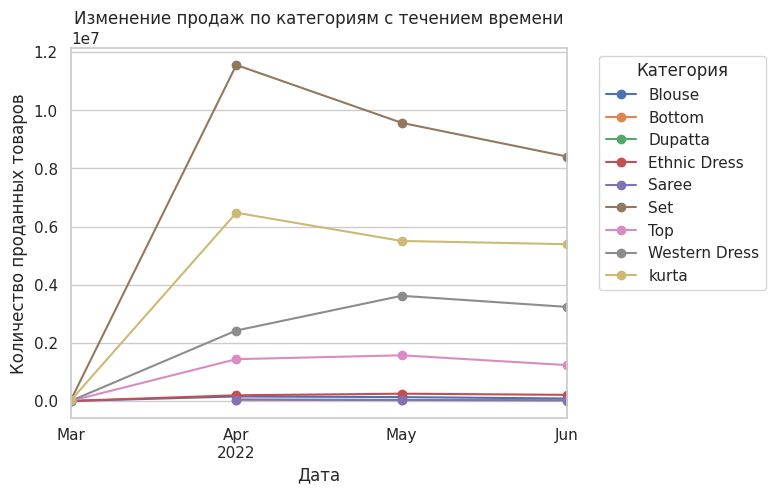

In [ ]:
# Какие категории товаров наиболее популярны и как их продажи меняются с течением времени?

# Преобразуем столбец 'Date' в формат даты
df_amazon_top_10_state['Date'] = pd.to_datetime(df_amazon_top_10_state['Date'], format='%m-%d-%y')

# Сгруппируем данные по категориям и месяцам
category_monthly_sales = df_amazon_top_10_state.groupby([df_amazon_top_10_state['Date'].dt.to_period('M'), df_amazon_top_10_state['Category']])['Amount'].sum().unstack()

plt.figure(figsize=(25, 10))
category_monthly_sales.plot(kind='line', marker='o')
plt.title('Изменение продаж по категориям с течением времени')
plt.xlabel('Дата')
plt.ylabel('Количество проданных товаров')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

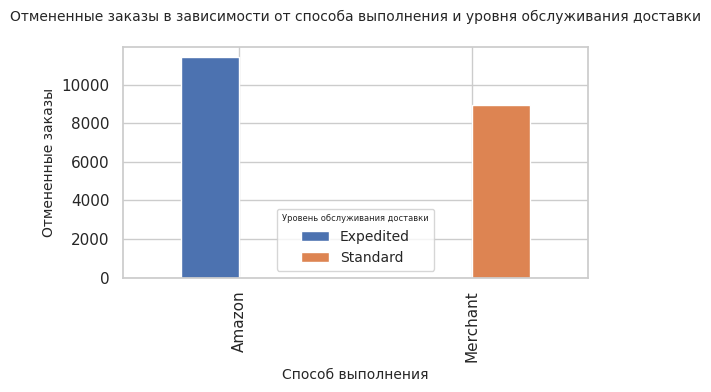

In [ ]:
# Отфильтруем датасет только по отмененным заказам
cancelled_df = df_amazon[df_amazon['status-group'] == 'Refusals']

# Посчитаем количество отмененных заказов в зависимости от способа продажи и уровня обслуживания доставки
by_fulfilment_shipping = cancelled_df.groupby(['Fulfilment', 'ship-service-level']).count()['SKU'].reset_index()

fig, ax = plt.subplots(figsize=(6, 3))
by_fulfilment_shipping.groupby(['Fulfilment', 'ship-service-level']).sum()['SKU'].unstack().plot(kind='bar', ax=ax)
ax.set_title('Отмененные заказы в зависимости от способа выполнения и уровня обслуживания доставки', fontsize=10, x=0.5, y=1.05, pad=10)
ax.set_xlabel('Способ выполнения',fontsize=10)
ax.set_ylabel('Отмененные заказы',fontsize=10)
ax.legend(title='Уровень обслуживания доставки', fontsize=10, title_fontsize=6)

plt.show()

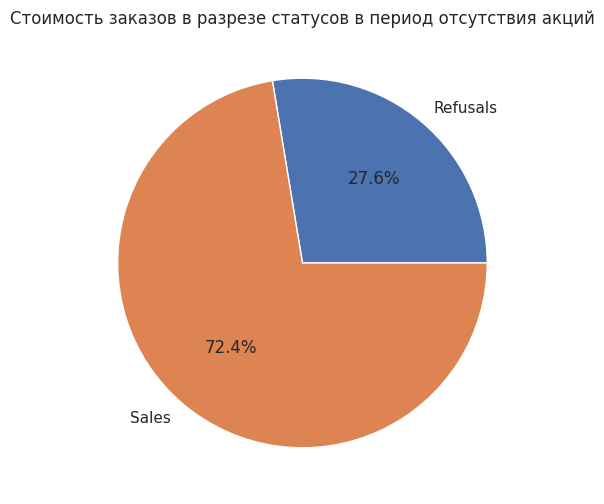

In [ ]:
# Посчитаем удельный вес стоимости отмененных заказов в периоды отсутствия акций
df_with_empty_promotion_ids = df_amazon[df_amazon['promotion-ids'].isnull()]
status_with_empty_promotion_ids = df_with_empty_promotion_ids.groupby(['status-group'])['Amount'].sum()

plt.figure(figsize=(10, 6))
plt.pie(status_with_empty_promotion_ids, labels=status_with_empty_promotion_ids.index, autopct='%1.1f%%')
plt.title('Стоимость заказов в разрезе статусов в период отсутствия акций', fontsize = 12)
plt.show()

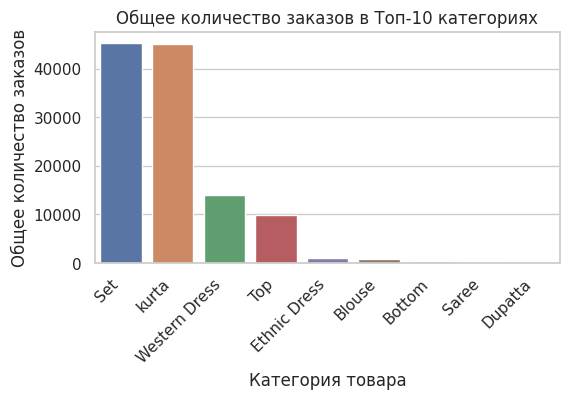

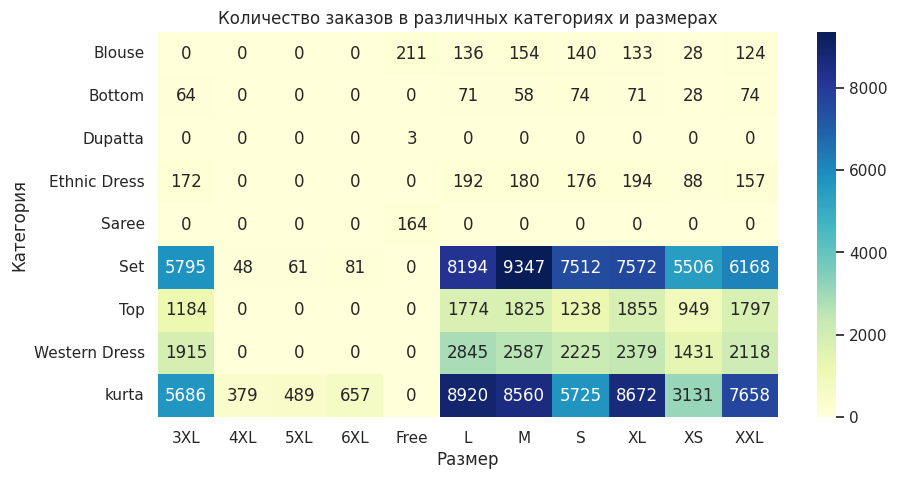

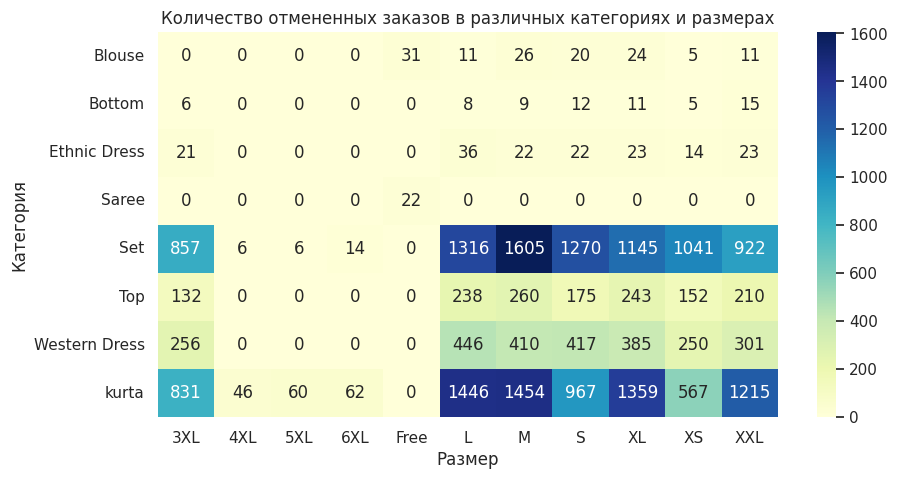

In [ ]:
# Определим топ-10 категорий товаров по количеству заказов
total_qty_by_category = df_amazon.groupby('Category')['Qty'].sum().sort_values(ascending=False)
top_10_categories = total_qty_by_category.head(10)

plt.figure(figsize=(6, 3))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, ci=None)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Категория товара')
plt.ylabel('Общее количество заказов')
plt.title('Общее количество заказов в Топ-10 категориях', fontsize = 12)
plt.show()

plt.figure(figsize=(10, 5))
pivot_table = df_amazon.pivot_table(index='Category', columns='Size', values='Qty', aggfunc='count', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Размер')
plt.ylabel('Категория')
plt.title('Количество заказов в различных категориях и размерах')
plt.show()

plt.figure(figsize=(10, 5))
pivot_table = cancelled_df.pivot_table(index='Category', columns='Size', values='Qty', aggfunc='count', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Размер')
plt.ylabel('Категория')
plt.title('Количество отмененных заказов в различных категориях и размерах')
plt.show()

In [ ]:
#Посчитаем среднее количество заказов и средний чек в зависиости от способа выполнения продаж

df_amazon[['Qty','Amount']].groupby(df_amazon['Fulfilment']).mean()

,Qty,Amount
Fulfilment,,
Amazon,0.937446,649.483506
Merchant,0.829035,646.507213


In [ ]:
#Создадим копию датасета для преобразования данных

df_amazon_copy = df_amazon[['Date', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU',
       'Category', 'Size', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'promotion-ids', 'B2B','status-group']].copy()
df_amazon_copy = df_amazon_copy[df_amazon_copy['status-group'] != 'Direct Losses']
df_amazon_copy['Month'] = df_amazon_copy['Date'].dt.month
df_amazon_copy['Day'] = df_amazon_copy['Date'].dt.day

df_amazon_copy["B2B"] = df_amazon_copy["B2B"].astype(object)

df_amazon_copy.isna().sum()

Date                      0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49153
B2B                       0
status-group              0
Month                     0
Day                       0
dtype: int64

In [ ]:
# обработаем пропуски и нулевые значения
df_amazon_copy["ship-state"].fillna("unknown", inplace = True)
df_amazon_copy["ship-city"].fillna("unknown", inplace = True)
df_amazon_copy["ship-postal-code"].fillna(0, inplace = True)
df_amazon_copy["promotion-ids"] = df_amazon_copy["promotion-ids"].replace(".*", "Yes", regex=True)
df_amazon_copy["promotion-ids"].fillna("No", inplace = True)
df_amazon_copy["Amount"] = df_amazon_copy["Amount"].replace(0,np.nan)
df_amazon_copy.dropna(subset= "Amount", inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Применим кодирование к категориальным переменным

def label_encode_categorical_columns(dataframe):
    label_encoder = LabelEncoder()
    for column in dataframe.select_dtypes(include=['object']).columns:
        dataframe[column] = label_encoder.fit_transform(dataframe[column])
    return dataframe

df_amazon_encoded = label_encode_categorical_columns(df_amazon_copy)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score

#Отбор признаков и целевой переменной

X = df_amazon_encoded[['Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU',
       'Category', 'Size', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'promotion-ids','B2B', 'Month', 'Day']]
Y = df_amazon_encoded['status-group']


# Разделение на тренировочный, валидационный и тестовый наборы (70% тренировочный, 15% валидационный и 15% тестовый).

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=10)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=15)

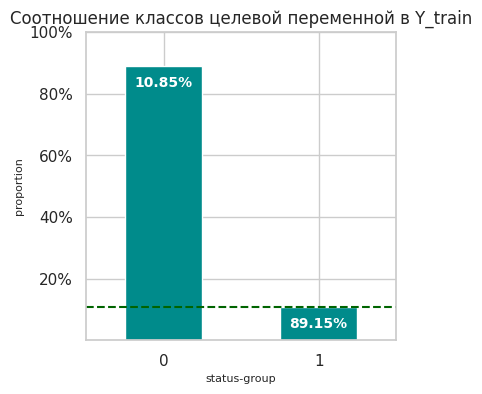

In [ ]:
fig,ax = plt.subplots(figsize = (4,4))

plot_dataseries = round(Y_train.value_counts(normalize = True)*100,2)

plot_dataseries.plot(kind = "bar",ax =ax, color = "darkcyan")
plt.axhline(y = plot_dataseries[0],color = "darkgreen", linestyle = "--")
plt.title("Соотношение классов целевой переменной в Y_train", fontsize = 12)
plt.ylabel("proportion", fontsize = 8)
plt.xlabel("status-group", fontsize = 8)
plt.xticks(ticks = range(len(plot_dataseries)),
           labels = ["0", "1"], rotation = "horizontal")
plt.yticks(ticks = [20,40,60,80,100], labels = ["20%","40%","60%","80%","100%"])
data_label = plot_dataseries.astype(str).str.cat(np.full((2,),"%"), sep = "")
for x,y in enumerate(plot_dataseries):
    plt.text(x,y-7,data_label[x],color = "white",
             fontweight = 700,fontsize = 10, horizontalalignment = "center")

plt.show()

In [ ]:
# необходимо сбалансировать выборку с целевой переменной

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 20)
X_train_over,Y_train_over = ros.fit_resample(X_train,Y_train)

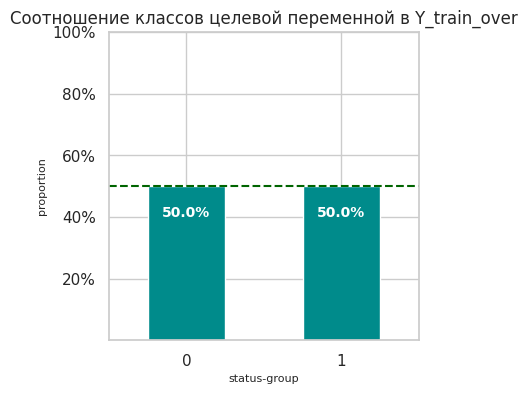

In [ ]:
fig,ax = plt.subplots(figsize = (4,4))

plot_dataseries = round(Y_train_over.value_counts(normalize = True)*100,2)

plot_dataseries.plot(kind = "bar",ax =ax, color = "darkcyan")
plt.axhline(y = plot_dataseries[0],color = "darkgreen", linestyle = "--")
plt.title("Соотношение классов целевой переменной в Y_train_over", fontsize = 12)
plt.ylabel("proportion", fontsize = 8)
plt.xlabel("status-group", fontsize = 8)
plt.xticks(ticks = range(len(plot_dataseries)),
           labels = ["0", "1"], rotation = "horizontal")
plt.yticks(ticks = [20,40,60,80,100], labels = ["20%","40%","60%","80%","100%"])
data_label = plot_dataseries.astype(str).str.cat(np.full((2,),"%"), sep = "")
for x,y in enumerate(plot_dataseries):
    plt.text(x,y-10,data_label[x],color = "white",
             fontweight = 700,fontsize = 10, horizontalalignment = "center")
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Определите количество складываемых фолдов и количество оцениваемых деревьев (если используете RandomForest)
num_folds = 5
n_estimators = 100

# Создайте список классификаторов
models = []
models.append(('LR', LogisticRegression()))
models.append(('KN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=n_estimators)))

# Оцените эффективность каждого алгоритма
scores = []
names = []
results = []
predictions = []
msg_row = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X_train_over, Y_train_over, cv=kfold, scoring='accuracy')
    names.append(name)
    results.append(cv_results)

    m_fit = model.fit(X_train_over, Y_train_over)
    m_predict = model.predict(X_valid)
    predictions.append(m_predict)
    m_score = accuracy_score(Y_valid, m_predict)
    scores.append(m_score)

    msg = "%s: train = %.3f  (%.3f) / valid = %.3f" % (name, cv_results.mean(), cv_results.std(), m_score)
    msg_row.append(msg)
    print(msg)

LR: train = 0.513  (0.002) / valid = 0.568
KN: train = 0.835  (0.003) / valid = 0.697
DTC: train = 0.964  (0.001) / valid = 0.901
RFC: train = 0.991  (0.000) / valid = 0.935


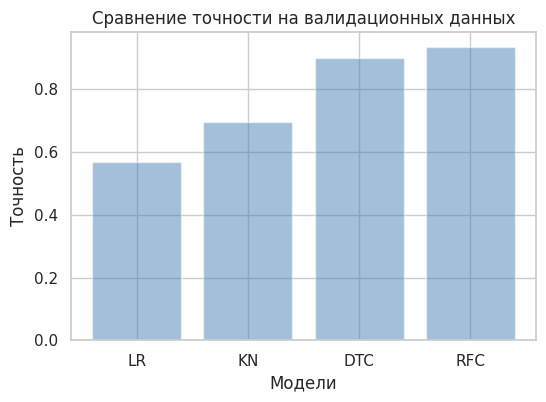

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(names, scores, alpha=0.5, align='center', color = 'steelblue')
plt.xlabel('Модели')
plt.ylabel('Точность')
plt.title('Сравнение точности на валидационных данных', fontsize = 12)
plt.show()


In [ ]:
#Применяем наиболее оптимальную на наш взгляд модель и оцениваем её.

from sklearn.model_selection import GridSearchCV

# Создание модели
optim_model = RandomForestClassifier()

# Задание сетки гиперпараметров для настройки
param_grid = {
    'n_estimators': [100, 150, 200],          # Разное количество деревьев
    'max_depth': [None, 10, 20],         # Максимальная глубина деревьев
    'min_samples_split': [1, 3, 5],        # Минимальное количество образцов для разделения
    'min_samples_leaf': [1, 2, 3],          # Минимальное количество образцов в листе
    'max_features': ['auto', 'sqrt', 'log2'], # Количество признаков для разделения
}

# Создание объекта GridSearchCV для поиска оптимальных гиперпараметров
grid_search = GridSearchCV(optim_model, param_grid, cv=5, scoring='accuracy')

# Выполнение поиска оптимальных гиперпараметров
grid_search.fit(X_train_over, Y_train_over)

# Вывод наилучших параметров и наилучшей оценки
print("Наилучшие гиперпараметры:", grid_search.best_params_)
print("Наилучшая оценка точности (Accuracy):", grid_search.best_score_)


Наилучшие гиперпараметры: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Наилучшая оценка точности (Accuracy): 0.99136292175622


In [ ]:
# Обучение модели с наилучшими параметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train_over, Y_train_over)

# Оценка производительности на тестовом наборе данных
test_score = best_model.score(X_test, Y_test)
print("Оценка точности (Accuracy) на тестовом наборе данных:", test_score)

Оценка точности (Accuracy) на тестовом наборе данных: 0.9351472650771389


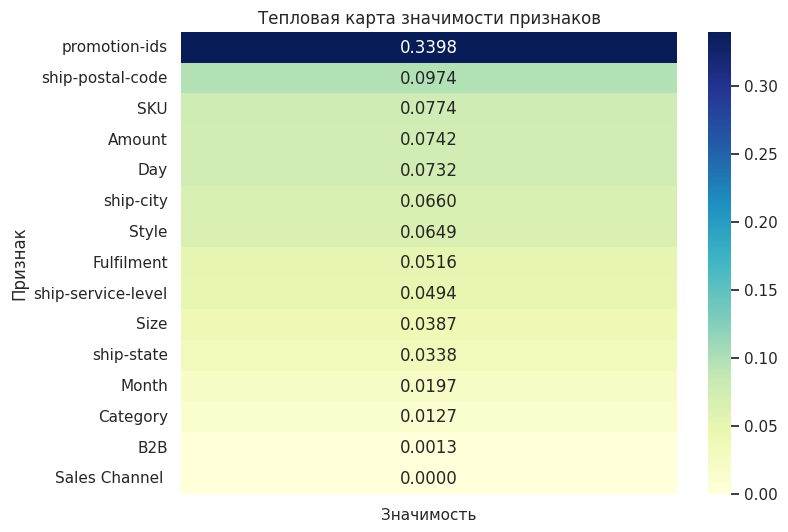

In [ ]:
#Определение значимости признаков.
feature_importances = pd.DataFrame(zip(X_train_over.columns, best_model.feature_importances_),
                                   columns=['Признак', 'Значимость'])

feature_importances = feature_importances.sort_values(by='Значимость', ascending=False)

# Создаем тепловую карту
plt.figure(figsize= (8, 6))
sns.heatmap(data=feature_importances.set_index('Признак'), cmap="YlGnBu", annot=True, fmt='.4f')
plt.title('Тепловая карта значимости признаков', fontsize = 12)
plt.show()

In [ ]:
# Выполненим предсказания на тестовом наборе данных
predictions = best_model.predict(X_test)

# Оценка производительности на тестовых данных
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
cm = confusion_matrix(Y_test, predictions)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9351472650771389
Precision: 0.9442235875195759
Recall: 0.9855400477807117
F1 Score: 0.9644395225790575


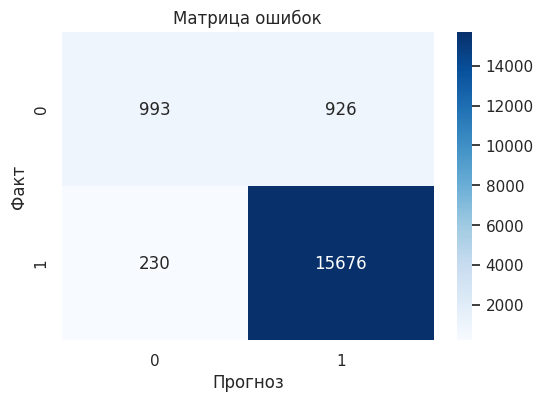

In [ ]:
cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.title('Матрица ошибок', fontsize = 12)
plt.show()

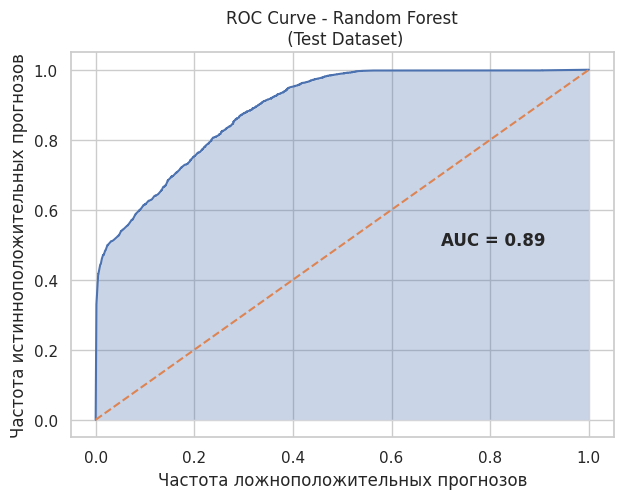

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score
fpr_rf,tpr_rf,thresh_rf = roc_curve(Y_test,
                           best_model.predict_proba(X_test)[:,1],
                           pos_label = 1)
# calculate the auc score
auc_rf = roc_auc_score(Y_test,best_model.predict_proba(X_test)[:,1])

# plot the curve
fig,ax = plt.subplots(figsize = (7,5))
plt.plot(fpr_rf,tpr_rf)
plt.plot([0,1],[0,1], linestyle = "--")
plt.xlabel("Частота ложноположительных прогнозов")
plt.ylabel("Частота истинноположительных прогнозов")
plt.title("ROC Curve - Random Forest\n (Test Dataset)",fontsize = 12
          )
plt.fill_between(fpr_rf,tpr_rf, alpha = 0.3)
plt.text(0.7,0.5,f"AUC = {round(auc_rf,3)}", fontweight = 700)
plt.show()